In [4]:
#classifier 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your dataset
df = pd.read_csv('Breast_cancer_data.csv')

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [8]:
#gini and entropy
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_gini.fit(X_train, y_train)
clf_entropy.fit(X_train, y_train)
# Making predictions
y_pred_gini = clf_gini.predict(X_test)
y_pred_entropy = clf_entropy.predict(X_test)

In [9]:
#by default it gives us gini
clf = DecisionTreeClassifier()
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)

In [10]:
#accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
classi=classification_report(y_test,y_pred)
print(classi)

0.8888888888888888
[[55  8]
 [11 97]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        63
           1       0.92      0.90      0.91       108

    accuracy                           0.89       171
   macro avg       0.88      0.89      0.88       171
weighted avg       0.89      0.89      0.89       171



<Axes: >

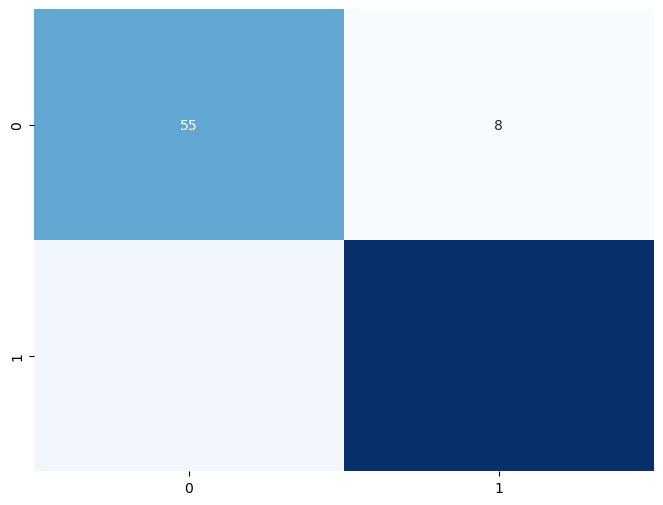

In [12]:
# Confusion matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

In [ ]:
#now overfitting graph

In [ ]:
train_scores, test_scores = [], []
for i in range(1, 12):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    #here we are finding train accuracy so used y_train and predicted on X-train instead of X_test
    train_acc = accuracy_score(y_train, model.predict(X_train))
    train_scores.append(train_acc)
    test=accuracy_score(y_test, model.predict(X_test))
    test_scores.append(accuracy_score(y_test, model.predict(X_test)))
    print(f' train score :{train_acc :.3f} , test score:{test_scores[-1]:.3f}')
    

In [ ]:
import matplotlib.pyplot as plt

# Plot the accuracy scores
plt.plot( train_scores, label='Training Accuracy')
plt.plot( test_scores, label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy vs Max Depth')
plt.legend()
plt.show()

In [ ]:
#regressor
#in classi

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error , mean_absolute_error

# Load your dataset
df = pd.read_csv('Desktop/work/ML-1/Exp 2 n 3/dataset/carprediction.csv')
df = pd.get_dummies(df)
X = df.drop('MSRP', axis=1)
y = df['MSRP']



In [ ]:
print(df.columns)

In [ ]:
df.dropna(inplace=True)
df.drop(columns=['Engine HP', 'Engine Cylinders'], inplace=True)

In [ ]:
# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DecisionTreeRegressor object
df = DecisionTreeRegressor()

# Fit the model to the training data
df.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = df.predict(X_test)

# Evaluate the model using mean absolute error, mean squared error, and R-squared
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

In [ ]:
pip install graphviz

pip install pydotplus

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

# Load your dataset
df = pd.read_csv('Desktop/work/ML-1/Exp 2 n 3/dataset/carprediction.csv')
df = pd.get_dummies(df)
X = df.drop('MSRP', axis=1)
y = df['MSRP']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree regressor
clf = DecisionTreeRegressor(random_state=42)
clf.fit(X_train, y_train)

# Generate visualization
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('car_prediction_tree.png')
Image(graph.create_png())


ModuleNotFoundError: No module named 'sklearn.externals.six'